# Chapter 4
# Classification

#### Classification problem is when we are predicting a qualitative variable.

The response variable in classification will be a class variable. For e.g. if an online transaction is fradulent or not. In this case we have 2 classes.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

__Default Dataset__

We will be looking at default dataset and plot some data.

In [2]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Default.csv"
Default = pd.read_csv(url, error_bad_lines = False, index_col = 0)
Default = Default.rename(columns = {'default':'Default', 'student':'Student','balance':'Balance','income':'Income'})

In [3]:
# The dataset is quite inbalanced so will first take a sample of majority and then do the plotting.
Default_sample = Default.copy()
Default_sample.sort_values(by = 'Default', inplace = True)
Default_sample['sample'] = np.arange(1, len(Default_sample) + 1, 1)
Default_sample.loc[Default_sample.Default == 'Yes', 'sample'] = 0
Default_sample.loc[Default_sample['sample']%30 == 0, 'sample'] = 0
Default_sample = Default_sample[Default_sample['sample'] == 0]
Default_sample['Default'].value_counts()

Yes    333
No     322
Name: Default, dtype: int64

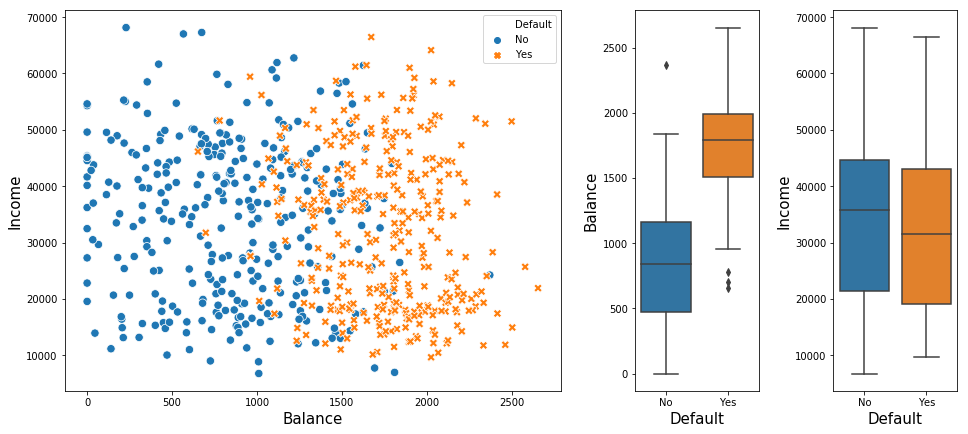

In [4]:
# We will be using seaborn so that we can color based on a third column in scatter plot.
plt.figure(figsize = (16,7))
gs = gridspec.GridSpec(1, 3, width_ratios = [1,0.25,0.25], wspace = 0.30)
ax1 = plt.subplot(gs[0])
ax1 = sns.scatterplot(x = 'Balance', y = 'Income', hue = 'Default', style = 'Default', s = 70, data = Default_sample)
ax1.set_xlabel('Balance',fontsize = 15)
ax1.set_ylabel('Income',fontsize = 15)
ax2 = plt.subplot(gs[1])
ax2 = sns.boxplot(x = 'Default', y = 'Balance', data = Default_sample)
ax2.set_xlabel('Default',fontsize = 15)
ax2.set_ylabel('Balance',fontsize = 15)
ax3 = plt.subplot(gs[2])
ax3 = sns.boxplot(x = 'Default', y = 'Income', data = Default_sample)
ax3.set_xlabel('Default',fontsize = 15)
ax3.set_ylabel('Income',fontsize = 15)
plt.show()

The objective is to predict the 'default' using other variable as predictors. We can see from the plot above that there is quite a strong relationship betweem Default and Balance. People with No Default has much lower Balance then people with Default as Yes.

__Why not Linear Regression?__

1. For linear regression, we need to convert qualitative variable to quantitative. As there is no natural way to convert a quantitative variable, different encoding of qualitative variable would produce fundamentally different linear model.
2. For a binary response with 0/1 coding, least square does not make sense. Some of our estimate might be outside the [0,1] interval and is difficult to interpret as probabilities.

## Logistic Regression

Rather than modeling the response Y directly, logistic regression models the probability that Y belongs to a particular class.
$$0<P(Y=y_i|X) < 1$$
$$or\ P(X)$$
A prediction can be made using a threshold say Y = 1 for $P(Y=y_i|X)$ > 0.5. In a conservative approach, we can see threshold much lower.

Now, if we model P(X) using the equation $$P(X) = \beta_0 + \beta_1 X$$ then P(X) might take a value outside [0,1] depends on the value of X. To avoid this, we need to use a function that gives outputs between 0 and 1 for all values of X.

In logistic regression, we use logistic function
$$P(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$
Shape of logistic function is a S-Shaped curve of this form.
$$\frac{P(X)}{1 - P(X)} = e^{\beta_0 + \beta_1 X}$$
where $$\frac{P(X)}{1 - P(X)}\ =\ odds\ (can\ take\ values\ between\ 0\ and\ infinity)$$
Value close to 0 and infinity indicates very low and high probabilities of success respectively.
$$log(\frac{P(X)}{1 - P(X)}) = \beta_0 + \beta_1 X$$
The left hand side is called the log odds or logit. The logit is linear in X.

In logistic regression model, increasing X by one unit changes the log odds by $\beta_1$ or equivalently it multiplies the odds by $e^{\beta_1}$.

However, the relationship between X and P(X) is not a straight line, $\beta_1$ does not correspond to the change in P(X). Change in the value of P(X) due to one unit change depends on current value of X.

In [6]:
Default['Default_0_1'] = 0
Default.loc[Default['Default'] == 'Yes', 'Default_0_1'] = 1
Default['Default_0_1'].value_counts()

0    9667
1     333
Name: Default_0_1, dtype: int64

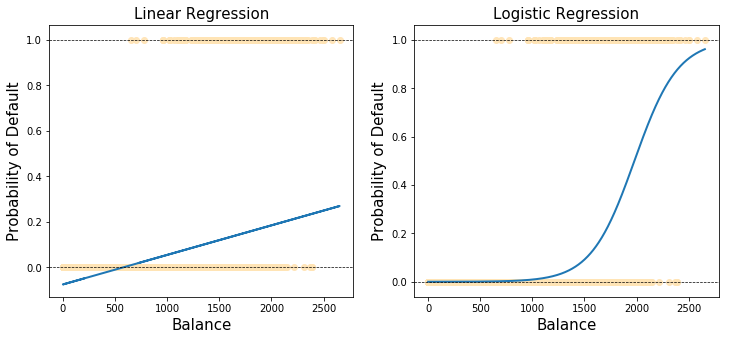

In [65]:
X = np.array(Default['Balance']).reshape(-1,1)
y = np.array(Default['Default_0_1'])

# Fitting a linear regression model for Default data.
lm = LinearRegression()
lm.fit(X,y)

# Now fitting the same using logistic regression.
clf = LogisticRegression()
clf.fit(X,y)

# Plottig the results from 2 different approaches for predicting class variable.
X1 = np.linspace(min(Default['Balance']),max(Default['Balance']) + 1, 1000)
X1 = X1.reshape(-1,1)

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(121)

ax1.scatter(X,y, color = 'moccasin', alpha = 0.9)
ax1.plot(X,lm.predict(X), linewidth = 2)
ax1.set_xlabel('Balance', fontsize = 15)
ax1.set_ylabel('Probability of Default', fontsize = 15)
ax1.axhline(0, color = 'black', linestyle = "--", linewidth = 0.7)
ax1.axhline(1, color = 'black', linestyle = "--", linewidth = 0.7)
ax1.set_title("Linear Regression", fontsize = 15)
ax2 = fig.add_subplot(122)

ax2.scatter(X,y, color = 'moccasin', alpha = 0.9)
ax2.plot(X1,clf.predict_proba(X1)[::,1], Linewidth = 2)
ax2.set_xlabel('Balance', fontsize = 15)
ax2.set_ylabel('Probability of Default', fontsize = 15)
ax2.axhline(0, color = 'black', linestyle = "--", linewidth = 0.7)
ax2.axhline(1, color = 'black', linestyle = "--", linewidth = 0.7)
ax2.set_title("Logistic Regression", fontsize = 15)
plt.show()

The above figure show the difference between using linear or logistic regression for the predicting class variable. Some probabilities in linear regression are outside 0 and 1 but not in logistic regression.